In [3]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

In [4]:
    def set_positions(self):
        """
        Processes collision layers and stores valid positions, ensuring agents are placed
        in horizontal pairs along the same y-coordinate.
        """
        for color in ["red", "green", "blue", "red dark"]:
            layer_collision = np.loadtxt(self.root + f"/Data/Input/collisions/['{color}'].txt", dtype=int)

            # Step 1: Collect all valid grid-aligned positions (x%32=0, y%16=0)
            positions_valid = [
                (x, y)
                for y in range(layer_collision.shape[0])
                for x in range(layer_collision.shape[1])
                if not layer_collision[y, x] and x % 32 == 0 and y % 16 == 0
            ]

            # Step 2: Ensure pairing happens **horizontally** by grouping positions by y-coordinate
            y_groups = defaultdict(list)
            for x, y in positions_valid:
                y_groups[y].append((x, y))  # Group by y-coordinate

            positions_filtered = []
            for y in sorted(y_groups.keys()):  # Process row by row
                y_groups[y].sort()  # Ensure left-to-right order

                # Ensure pairs are formed **horizontally** by taking two at a time
                while len(y_groups[y]) >= 2:
                    positions_filtered.append(y_groups[y].pop(0))  # Take the leftmost
                    positions_filtered.append(y_groups[y].pop(0))  # Take the next one on the right

            # Step 3: Sort positions **left to right, row by row**
            positions_filtered = positions_filtered.sort(key=lambda pos: (pos[1], pos[0]))

            # Step 4: Write filtered positions to file
            with open(self.root + f"/Data/Input/coordinates/{color}.txt", "w") as file:
                json.dump(positions_filtered, file)

NameError: name 'x_vals' is not defined

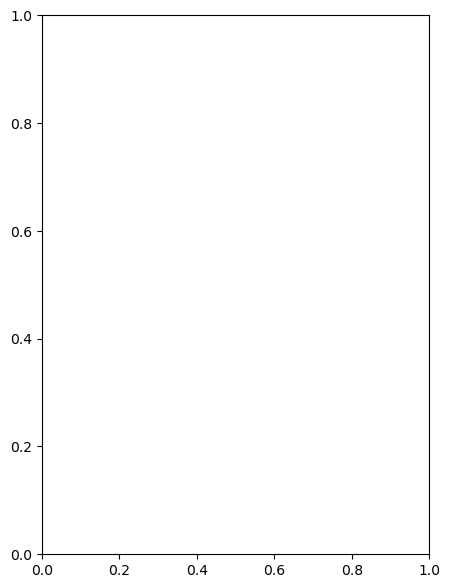

In [5]:

fig, ax = plt.subplots(figsize=(5, 7))  # 500x700 scale in inches (assuming 100 dpi per inch)
ax.scatter(x_vals, y_vals, color='blue', marker='o', label="Filtered Positions")

# Formatting
ax.set_xlim(0, 500)
ax.set_ylim(700, 0)  # Inverting y-axis to match grid convention (top-left origin)
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_title("Filtered Positions on 500x700 Map")
ax.legend()
ax.grid(True)

# Show plot
plt.show()